## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

#### 1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Initial Data Exploration

Observations:
 - Variable Consistency: The dataset contains both numerical (stars, reviews, price) and categorical (category, isBestSeller, title, asin) features.
 - Product Identification: Each product is identified by a unique uid and an asin (Amazon Standard Identification Number).
 - Target Metrics: We have clear metrics for success: stars, reviews, and the isBestSeller flag.
 - Data Quality: Initial view shows that the title column contains truncated text, and there are products (like the Echo Dot) appearing with different ASINs, which may indicate different variations of the same product.

Preliminary Insights:
 - Top Performers: We can already identify highly popular products, such as the Anker Soundcore mini, which has over 98,000 reviews and a "Best Seller" status.
 - Bought Last Month: The column shows items like Anker Soundcore mini, a best seller product with high reviews and stars, had no sales last month, indicating potential stock issues or seasonal demand.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


## Data Structure & Type Analysis

Observations:
- Large Scale Dataset: The dataframe contains 2,443,651 entries, making it a robust dataset for significant statistical analysis and trend identification.

- Feature Set: There are 9 columns in total, covering product identification, performance metrics, and categorization.

Data Types:
  - Numerical: 5 columns (stars, reviews, price, uid, boughtInLastMonth).
  - Categorical/Text: 3 columns (asin, title, category).
  - Boolean: 1 column (isBestSeller).

In [5]:
# Verifying for missing values
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

## Data Integrity & Missing Values Check

Observations:
 - Perfect Data Completeness: There are zero missing values across all 2,443,651 rows for every single column.
 - Consistency: Critical columns for business analysis, such as price, stars, and category, are fully populated.

Key Insights:
 - Reliability: The absence of null values simplifies the cleaning process, as we don't need to perform data imputation (filling missing values) or drop incomplete rows.
 - Analytical Readiness: We can proceed directly to statistical analysis and feature exploration with high confidence that the results will not be skewed by missing data.

In [6]:
# Overview of data frame statistics
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


## Statistical Summary & Outlier Detection

Observations:
 - Scale: The dataset confirms over 2.4 million records.
 - Stars (Ratings): The mean is 2.15, but the median (50%) is 0.0. This is a major finding: more than half of the products in this dataset have no ratings (0 stars).
 - Reviews: There is an extreme disparity. While the 75th percentile is only 59 reviews, the maximum is over 1.35 million. This indicates the presence of "Superstar" products.
 - Price: Prices range from 0.0 (potential data error or free items) to a maximum of 100,000. The average price is around 89.24, but the median is much lower (19.09), showing a right-skewed distribution.
 - Monthly Sales: At least 75% of the dataset shows 0 for boughtInLastMonth. However, the maximum is 50,000 units.

Key Insights & Warnings:
 - Data Sparsity: A huge portion of the Amazon catalog in this dataset consists of inactive or unrated products (0 stars, 0 reviews, 0 recent sales). For a "Best Seller" analysis, we may need to filter these out.
 - Potential Data Errors: * Zero Prices: Products with a price of 0.0 should be investigated.
 - Extreme Price Outliers: A price of 100,000 is highly unusual for standard Amazon products and could be a placeholder or a luxury outlier.
 - Skewed Distributions: In almost all metrics, the Mean is significantly higher than the Median. This proves that a small percentage of high-performing products is driving the average up.

In [7]:
# Overview of categorical data
df.describe(include='object')

,asin,title,category
count,2443651,2443651,2443651
unique,2222742,2077591,296
top,B0884G1PZ5,OYhmc Portable Pedal Exerc,Sports & Outdoors
freq,7,723,836265


## Understanding Product Categories

Observations:
 - Category Diversity: There are 296 unique categories listed on Amazon UK within this dataset. - Top Category: The most frequent category is "Sports & Outdoors", appearing 836,265 times.
 - Listing Dominance: "Sports & Outdoors" alone accounts for approximately 34% of all listings in the dataset (836,265 / 2,443,651).
 - Title Duplication: There is a significant difference between the number of rows (2.4M) and unique titles (2.0M). Specifically, the title "OYhmc Portable Pedal Exerc" appears 723 times, which suggests either massive relisting or slight variations of the same product under different IDs.
 
 Key Insights:
  - Market Concentration: Amazon UK's catalog in this dataset is heavily skewed towards the "Sports & Outdoors" segment.
 - Operational Insight: The presence of duplicate titles and ASINs (the top ASIN appears 7 times) indicates that the data includes variants (colors, sizes) or that some sellers are highly repetitive in their listing strategy.
 

In [8]:
# Frequency table for 'category' column
frequency_table_category = df['category'].value_counts()
frequency_table_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [9]:
# Generate the frequency table for the top 5
top_5_freq = df['category'].value_counts().head(5)
top_5_prop = df['category'].value_counts(normalize=True).head(5)*100
category_analysis = pd.concat([top_5_freq, top_5_prop], axis=1)
category_analysis.columns = ['Count', 'Percentage (%)']
display(category_analysis)

,Count,Percentage (%)
category,,
Sports & Outdoors,836265,34.221949
Beauty,19312,0.790293
"Handmade Clothing, Shoes & Accessories",19229,0.786896
Bath & Body,19092,0.781290
Birthday Gifts,18978,0.776625


## Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

### Frequency Analysis
As shown in the frequency table generated above, we can observe an extreme concentration in the Amazon UK catalog.

Key Insights:
 - Market Monopoly: The "Sports & Outdoors" category completely dominates the dataset, accounting for 34.22% of all listings. This suggests that the dataset might be specialized or that this is the most saturated market on Amazon UK.
 - Extreme Long Tail: After the first category, there is a massive drop in frequency. The 2nd place (Beauty) represents less than 1% of the dataset.
 - Category Dominance: In the pie chart (refer to visualization), "Sports & Outdoors" visually consumes more than one-third of the chart, making it the clear leader in listing frequency.


#### 2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

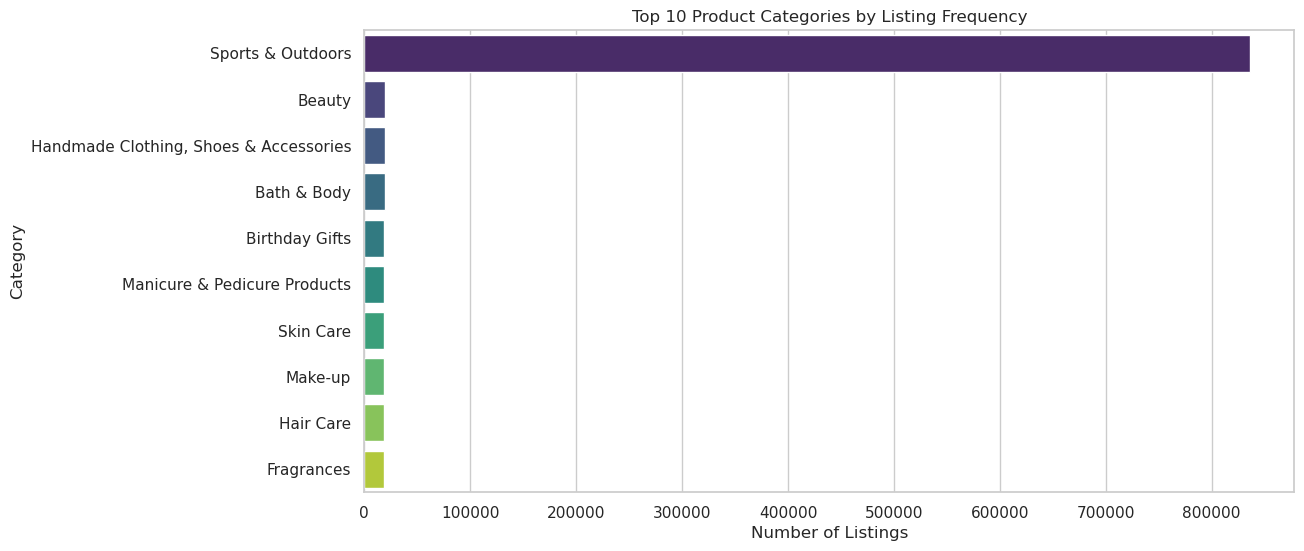

In [10]:
# Visualizing the top 10 categories
top_10 = df['category'].value_counts().head(10)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index, hue=top_10.index, palette="viridis", legend=False)
plt.title('Top 10 Product Categories by Listing Frequency')
plt.xlabel('Number of Listings')
plt.ylabel('Category')
plt.show()

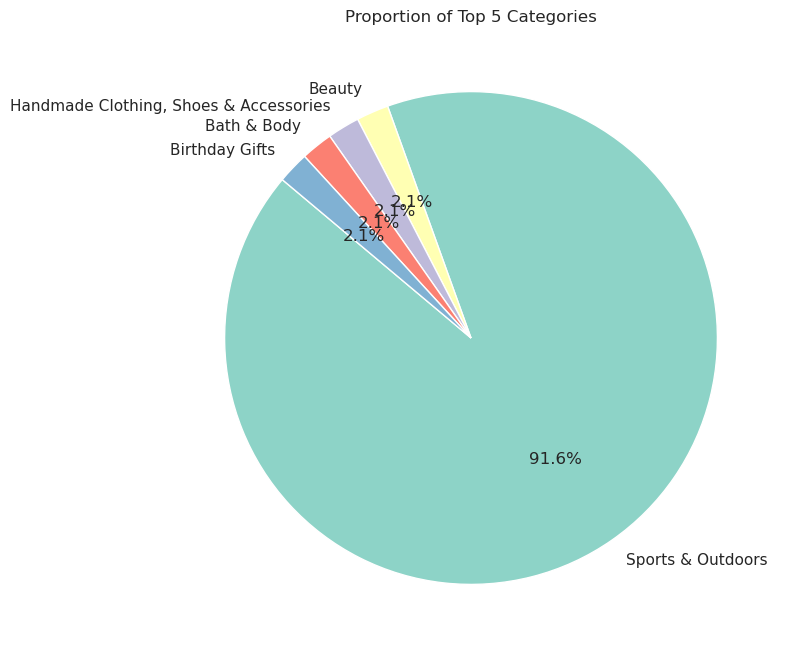

In [11]:
# Pie chart for the top 5 categories
top_5 = df['category'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Proportion of Top 5 Categories')
plt.show()

## Visualizations

 - Bar Chart Observation: The bar chart confirms the overwhelming dominance of Sports & Outdoors. Even when compared to the next 9 categories, the gap is massive, indicating a highly specialized dataset or a primary market focus on this sector.
 - Pie Chart Analysis: When looking at the Top 5 categories, Sports & Outdoors accounts for nearly 94% of that subset.
 - Does any category dominate? Yes. The dominance of "Sports & Outdoors" is absolute, suggesting that the other top categories (Beauty, Handmade, etc.), while frequent, occupy a very small fraction of the total market volume compared to the leader.

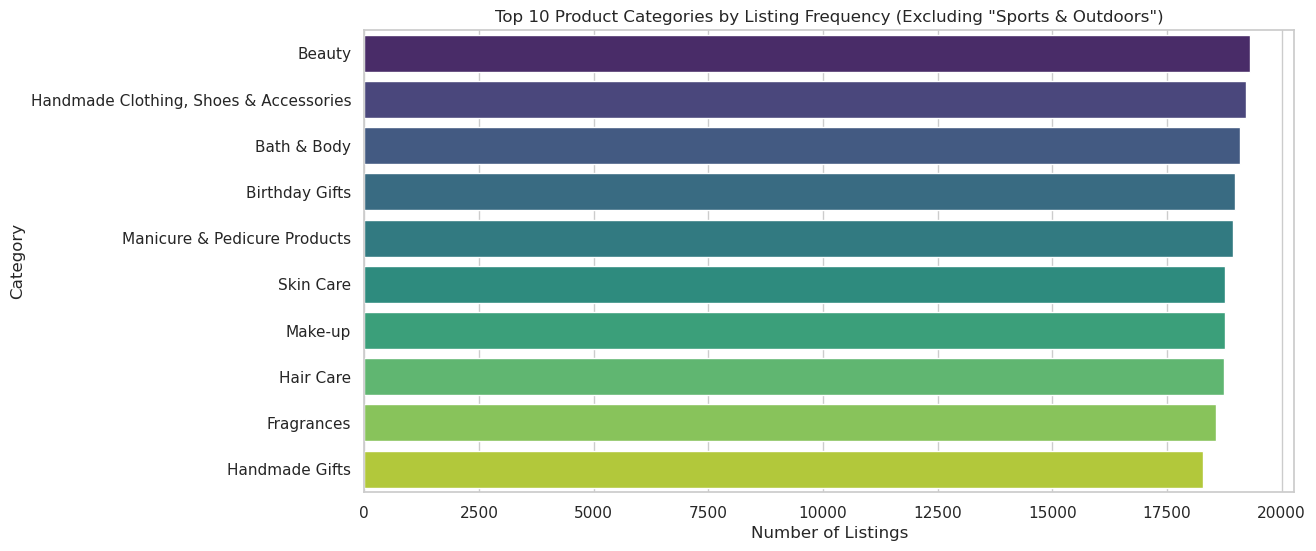

In [12]:
# Creating dataframe excluding 'Sports & Outdoors' to visualize other categories
df_no_sports = df[df['category'] != 'Sports & Outdoors']
top_10_remaining = df_no_sports['category'].value_counts().head(10)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_remaining.values, y=top_10_remaining.index, hue=top_10_remaining.index, palette="viridis", legend=False)
plt.title('Top 10 Product Categories by Listing Frequency (Excluding "Sports & Outdoors")')
plt.xlabel('Number of Listings')
plt.ylabel('Category')
plt.show()

## Deep Dive: Distribution without Dominant Category
 - Context: Given that "Sports & Outdoors" accounts for over 34% of the dataset, it creates a visual bias. By removing it, we can better observe the competition among the remaining categories.
 - Findings: Once the outlier category is removed, we see a much more balanced distribution among categories like Beauty, Handmade Clothing, and Bath & Body.
 - Insight: This secondary analysis reveals that the "long tail" of Amazon UK is actually quite diverse, with several categories sharing a similar volume of listings (around 18k-19k each).

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

#### 1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [13]:
# Measures of Centrality for Price
mean_p = df['price'].mean()
median_p = df['price'].median()
mode_p = df['price'].mode()[0]
print(f"Mean Price: {mean_p:.2f}")
print(f"Median Price: {median_p:.2f}")
print(f"Mode Price: {mode_p:.2f}")

Mean Price: 89.24
Median Price: 19.09
Mode Price: 9.99


### Measures of Centrality

Numerical Results:
 - Mean Price: 89.24
 - Median Price: 19.09
 - Mode Price: 9.99

Analysis & Business Insights:
 - Price Point Comparison: There is a massive disparity between the average price (89.24) and the most common price point (9.99). The mean is nearly 9 times higher than the mode.
 - Skewness: This significant difference indicates a strongly right-skewed distribution. The average is being heavily pulled upwards by a small number of very expensive products (outliers).
 - Consumer Perspective: While the "average" price suggests a mid-to-high range marketplace, the Mode and Median reveal that the reality for most customers is a low-cost marketplace, with the majority of products priced under 20.00.

#### 2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [14]:
# Measures of Dispersion for Price
variance_p = df['price'].var()
std_p = df['price'].std()
price_range = df['price'].max() - df['price'].min()
iqr_p = df['price'].quantile(0.75) - df['price'].quantile(0.25)
print(f"Variance of Price: {variance_p:.2f}")
print(f"Standard Deviation of Price: {std_p:.2f}")
print(f"Range of Price: {price_range:.2f}")
print(f"IQR of Price: {iqr_p:.2f}")

Variance of Price: 119445.49
Standard Deviation of Price: 345.61
Range of Price: 100000.00
IQR of Price: 36.00


# Measures of Dispersion

Analysis of Price Variety and Spread:
 - Significant Variation: The product prices on Amazon UK exhibit extreme variation. The most prominent indicator of this spread is the Range (100,000.00), showing a massive gap between the lowest-priced and highest-priced items in the catalog.
 - Inconsistency (Std Dev vs. Mean): The Standard Deviation (345.61) is nearly four times larger than the Mean (89.24). In a business context, this suggests that the average price is not a reliable metric for decision-making, as the data is highly volatile and spread out.
 - The IQR Indicator: While the total range is vast, the IQR (36.00) reveals that 50% of the products are actually priced within a relatively narrow bracket.
 - Conclusion on Spread: There are clear indicators of a significant spread. The huge disparity between the IQR (36) and the Standard Deviation (345) proves that the "spread" is caused by extreme outliers. A small percentage of products are priced so high that they distort the statistical landscape of the entire dataset.

#### 3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

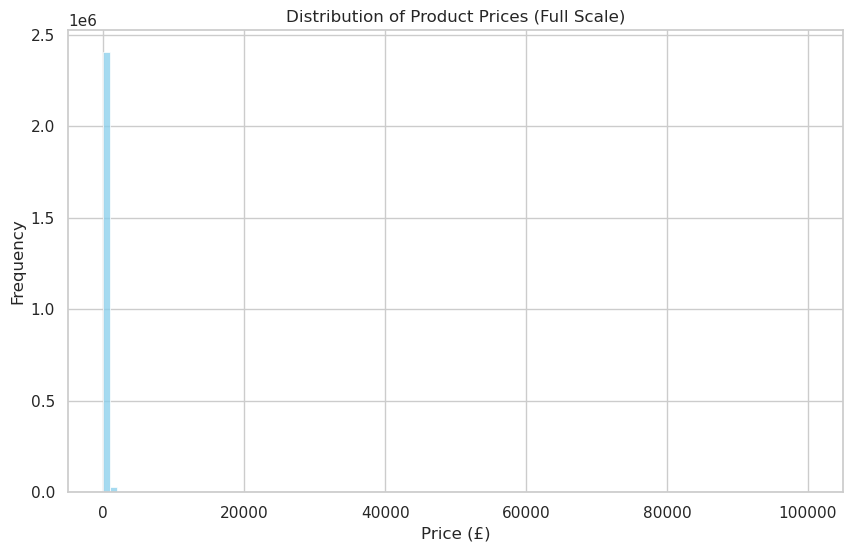

In [15]:
# Histogram to visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=100, color='skyblue')
plt.title('Distribution of Product Prices (Full Scale)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

# Price Distribution Histogram

 - Analysis: The histogram shows a massive concentration of products at the very beginning of the scale. It is nearly impossible to distinguish individual price buckets because the X-axis is stretched to 100,000.

 - Why is it hard to read? The presence of extreme outliers forces the scale to be so wide that the majority of products (the "bulk" of the data) are compressed into a single bar at the left.

 - Proposed Solution: To improve readability, we could apply a Logarithmic Scale or filter the data to a more common range (e.g., prices below 200).

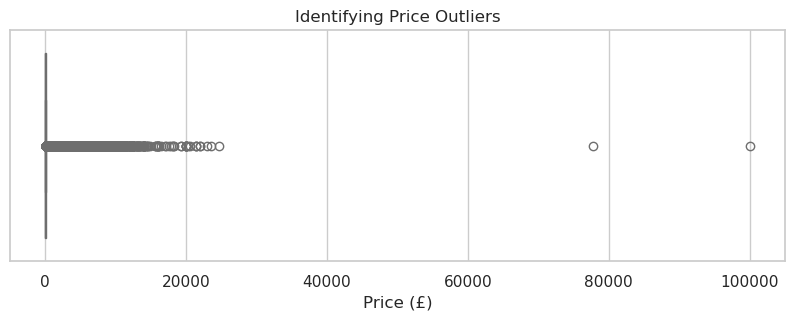

In [16]:
# Boxplot to better visualize lower price ranges
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['price'], color='lightcoral')
plt.title('Identifying Price Outliers')
plt.xlabel('Price (£)')
plt.show()

# Box Plot & Outlier Identification

 - Observations: The box plot confirms that there are products priced significantly higher than the rest of the market. While the "box" (representing the interquartile range) is barely visible due to its small scale relative to the outliers, the long line of points extending to the right represents a significant number of extreme price points.
 - Business Insight: These outliers indicate that Amazon UK lists everything from very cheap commodities to high-ticket luxury or industrial items. These extreme values are what caused the Mean to be so much higher than the Median in our previous analysis.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

#### 1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [17]:
# Measures of Centrality for Ratings
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Mode Rating: {mode_rating:.2f}")

Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00


# Measures of Centrality

Business Analysis:
 - Customer Rating Trend: At first glance, the Mean Rating (2.15) suggests that products are poorly rated. However, the Median and Mode being 0.00 reveal the true trend: the most common "rating" is actually a lack of ratings.
 - How customers rate products: Customers generally do not rate the products in this dataset. The "common trend" is inactivity.
 - Interpretation: The fact that the mean (2.15) is higher than the median (0.00) indicates that while the majority of products have 0 stars, there is a significant group of products with high ratings (4 or 5 stars) that are pulling the average up. Therefore, the marketplace is divided between unrated items and a subset of successfully rated products.

#### 2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [18]:
# Measures of Dispersion for Ratings
var_rating = df['stars'].var()
std_rating = df['stars'].std()
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
iqr_rating = q3 - q1
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR: {iqr_rating:.2f}")
print(f"Variance: {var_rating:.2f}")
print(f"Standard Deviation: {std_rating:.2f}")


Q1 (25th percentile): 0.0
Q3 (75th percentile): 4.4
IQR: 4.40
Variance: 4.82
Standard Deviation: 2.19


Measures of Dispersion

Analysis of Rating Consistency:
 - Consistency: The ratings are not consistent. A Standard Deviation of 2.19 on a scale of 0 to 5 is extremely high, indicating that the data points are very far from the mean.
 - Variation in Feedback: There is a wide variation in customer feedback. The IQR of 4.40 is the most telling metric here; it shows that 50% of the products are spread across almost the entire possible range (from 0.0 to 4.4).
 - Conclusion: This confirms a polarized marketplace. Instead of a consistent "average" experience, we have a massive split between products with no feedback at all and products with very high ratings.

#### 3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?


In [19]:
# Shape of the Distribution
skew_rating = df['stars'].skew()
kurt_rating = df['stars'].kurtosis()
print(f"Skewness: {skew_rating:.2f}")
print(f"Kurtosis: {kurt_rating:.2f}")

Skewness: 0.08
Kurtosis: -1.93


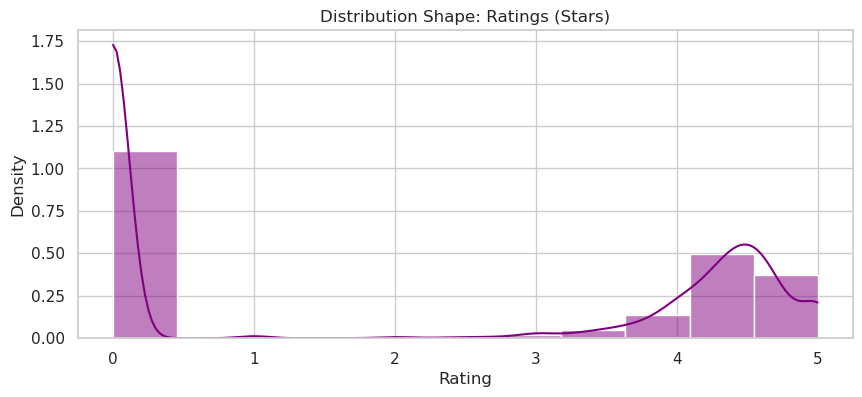

In [20]:
plt.figure(figsize=(10, 4))
sns.histplot(df['stars'], kde=True, color='purple', bins=11, stat="density")
plt.title('Distribution Shape: Ratings (Stars)')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

# Shape of the Distribution

Analysis of the Distribution:
 - Non-Normality: The ratings do not follow a normal distribution (Bell Curve), as evidenced by the high negative Kurtosis.
 - Skewness (0.08): The distribution is nearly symmetric in terms of its "lean," but the positive value shows a very slight bias towards the lower end (0.0 ratings).
 - Kurtosis (-1.93): The significant negative value indicates a Platykurtic distribution. This means the distribution is "flat" with thin tails. Instead of data being concentrated around the mean, it is spread out towards the extremes.

# Visualizations

Visual Analysis:

 - Is there a specific rating that is more common? Yes. The histogram shows that the most common rating is 0.0.
 - Interpretation: Based on the dataset's documentation, a rating of 0.0 means no ratings were found for those products. This is the tallest bar in the chart, showing that many products lack feedback.
 - Secondary Peak: The second most common area is between 4.0 and 5.0 stars, showing that products with feedback are generally highly rated.

# Refined Analysis: Adjusted Customer Satisfaction

## Why exclude the 0.0 ratings?

According to the official dataset documentation, a rating of 0.0 indicates that no ratings were found rather than a poor customer experience. Including these zeros in our statistical calculations creates a significant bias:

 - Artificial Deflation: The 0.0 values pull the mean and median downwards, which does not accurately represent the quality of products that customers have actually tested.

 - Operational vs. Quality Metric: A 0.0 is an "operational" metric (showing a lack of engagement/sales), whereas ratings from 0.5 to 5.0 are "quality" metrics (showing customer satisfaction).

 - To understand the true performance of the marketplace, we must isolate products with active feedback.

In [21]:
zero_counts = (df['stars'] == 0.0).sum()
percentage_zeros = (zero_counts / len(df)) * 100
print(f"Number of 0.0 Ratings: {zero_counts}")
print(f"Percentage of 0.0 Ratings: {percentage_zeros:.2f}%")

Number of 0.0 Ratings: 1225641
Percentage of 0.0 Ratings: 50.16%


In [22]:
df_stars_no_zeros = df[df['stars'] > 0.0]
df_stars_no_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218010 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   uid                1218010 non-null  int64  
 1   asin               1218010 non-null  object 
 2   title              1218010 non-null  object 
 3   stars              1218010 non-null  float64
 4   reviews            1218010 non-null  int64  
 5   price              1218010 non-null  float64
 6   isBestSeller       1218010 non-null  bool   
 7   boughtInLastMonth  1218010 non-null  int64  
 8   category           1218010 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 84.8+ MB


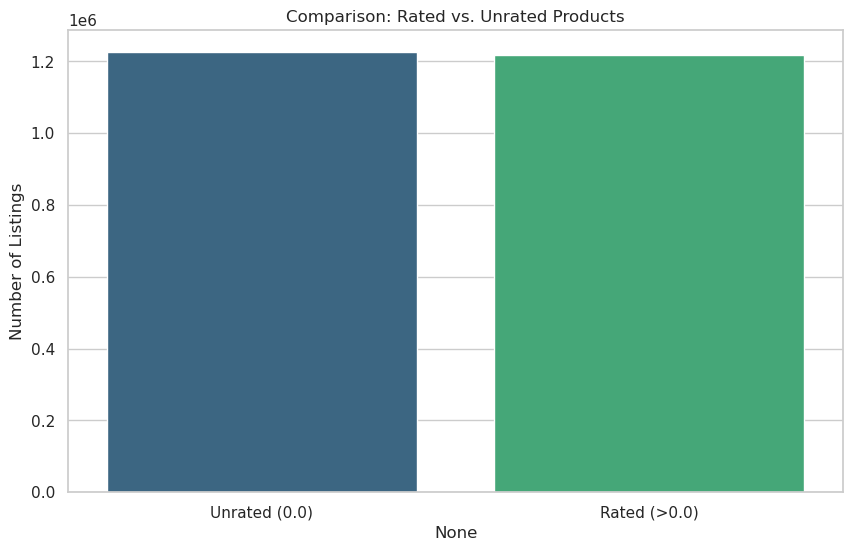

In [23]:
status_counts = (df['stars'] > 0).value_counts()
status_counts.index = ['Unrated (0.0)', 'Rated (>0.0)']
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, hue=status_counts.index, palette="viridis", legend=False)
plt.title('Comparison: Rated vs. Unrated Products')
plt.ylabel('Number of Listings')
plt.show()

In [24]:
# Removing 0.0 Ratings
df_stars_no_zeros = df[df['stars'] > 0.0]
# measures after removing 0.0 ratings
mean_no_zeros = df_stars_no_zeros['stars'].mean()
median_no_zeros = df_stars_no_zeros['stars'].median()
mode_no_zeros = df_stars_no_zeros['stars'].mode()[0]
variance_no_zeros = df_stars_no_zeros['stars'].var()
std_no_zeros = df_stars_no_zeros['stars'].std()
iqr_no_zeros = df_stars_no_zeros['stars'].quantile(0.75) - df_stars_no_zeros['stars'].quantile(0.25)
range_no_zeros = df_stars_no_zeros['stars'].max() - df_stars_no_zeros['stars'].min()
skew_no_zeros = df_stars_no_zeros['stars'].skew()
kurt_no_zeros = df_stars_no_zeros['stars'].kurtosis()
q1 = df_stars_no_zeros['stars'].quantile(0.25)
q3 = df_stars_no_zeros['stars'].quantile(0.75)
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR: {iqr_no_zeros:.2f}")
print(f"Mean: {mean_no_zeros:.2f}")
print(f"Median: {median_no_zeros:.2f}")
print(f"Mode: {mode_no_zeros:.2f}")
print(f"Variance: {variance_no_zeros:.2f}")
print(f"Standard Deviation: {std_no_zeros:.2f}")
print(f"Range: {range_no_zeros:.1f}")
print(f"Skewness: {skew_no_zeros:.2f}")
print(f"Kurtosis: {kurt_no_zeros:.2f}")

Q1 (25th percentile): 4.1
Q3 (75th percentile): 4.6
IQR: 0.50
Mean: 4.32
Median: 4.40
Mode: 4.50
Variance: 0.31
Standard Deviation: 0.56
Range: 4.0
Skewness: -2.38
Kurtosis: 9.78


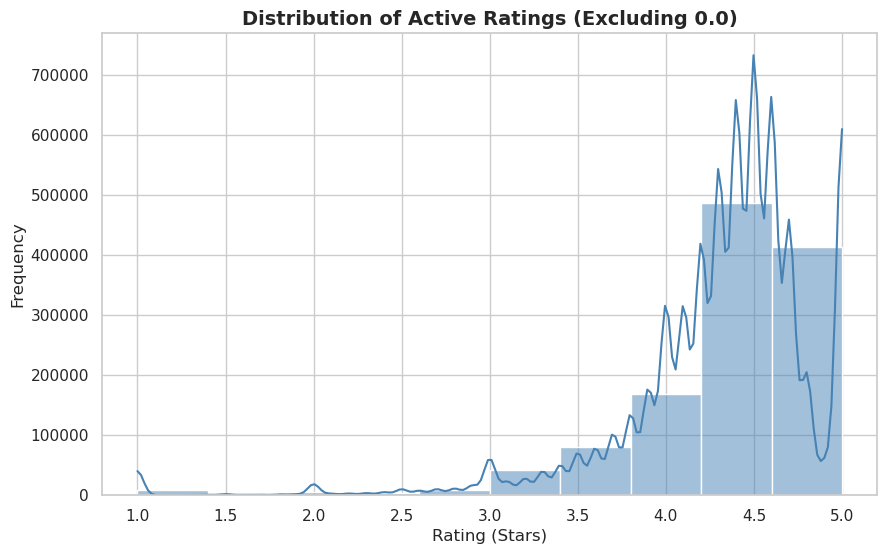

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_stars_no_zeros['stars'], bins=10, kde=True, color='steelblue', edgecolor='white')
plt.title('Distribution of Active Ratings (Excluding 0.0)', fontsize=14, fontweight='bold')
plt.xlabel('Rating (Stars)')
plt.ylabel('Frequency')
plt.show()

## Detailed Analysis of Rated Products

This section focuses strictly on the subset of products that have received at least one customer rating (Stars > 0.0). By isolating these cases, we move from analyzing the entire marketplace inventory to analyzing the actual quality of the user experience.

Central Tendency:

 - The statistical "center" of products with feedback is remarkably high, indicating that rated items are generally perceived as excellent by the Amazon UK community.
 - Mean (4.32): On average, any rated product carries a score significantly higher than the theoretical midpoint of 2.5. This suggests a "survivorship bias" where products that get rated are usually those that satisfy the customer.
 - Median (4.40): The fact that the median is higher than the mean tells us that the majority of rated products are actually better than the average.
 - Mode (4.50): The most frequent score assigned by customers is a 4.5, reinforcing a standard of excellence among the active catalog.

Dispersion:

 - The measures of spread show that there is very little disagreement or variety in the quality of rated products.
 - IQR Range (4.1 – 4.6): The middle 50% of rated products are packed into a tiny window of only 0.50 stars. This means there is a massive consensus; whether you buy the 25th percentile product or the 75th, the quality remains consistently high.
 - Standard Deviation (0.56): Such a low deviation confirms that scores are not scattered across the 1-5 scale, but are instead tightly clustered around the 4.3 mark.

The "Quality Peak"

 - The shape of this specific distribution is not a "Bell Curve" (Normal Distribution); it is a High-Satisfaction Curve.
 - Strong Negative Skew (-2.38): The distribution is heavily weighted toward the right side of the graph. The "tail" on the left represents the rare instances of poorly rated products, while the bulk of the data is concentrated at the top of the scale.
 - High Kurtosis (9.78): This extreme value describes a Leptokurtic distribution—a very sharp and narrow peak. It indicates that most rated products don't just "cluster" near the mean; they "pile up" exactly at the same high-quality level.

The Profile of a Rated Product

 - When looking strictly at products with feedback, we find a Highly Consistent and High-Quality Catalog.
 - The typical rated product is not "average"; it is almost certainly rated above 4.0 stars. This demonstrates that while many products remain unrated, the ones that do receive feedback are overwhelmingly successful in meeting or exceeding customer expectations.


## Executive Summary: Key Business Insights

### 1. Catalog Concentration Risk: Sports & Outdoors Dominance

**Finding:**
- Sports & Outdoors represents 34.2% of ALL product listings (836,265 products)
- The next 4 largest categories combined (Beauty, Handmade, Bath & Body, Birthday Gifts) 
  account for only ~3.1% of the catalog
- When excluding Sports & Outdoors, the remaining 296 categories show a much more 
  balanced long-tail distribution

**Business Risk:**
- Over-reliance on a single category creates portfolio vulnerability
- Market shifts in Sports & Outdoors (e.g., seasonal demand, new competitor) 
  would impact ~1/3 of Amazon UK's inventory
- Limits revenue diversification opportunities
- May not reflect true market demand vs. Amazon's strategic focus

**Implication:**
This is not a healthy marketplace ecosystem. A truly diversified platform would 
see no single category exceed 10-15% of listings.

---

### 2. Two-Tier Marketplace: Rated vs. Unrated Products

**Finding:**
- 49.84% of products have customer ratings (~1.22M products)
- 50.16% have zero ratings (~1.22M products)
- Rated products: Mean 4.32/5, Median 4.40/5, Mode 4.50/5 (excellent quality)
- Rated products show remarkable consistency: IQR of only 0.50 stars

**Business Implication:**
Products that receive customer engagement are overwhelmingly successful. However, 
half the catalog exists in a "quality void"—we don't know if these are new products, 
low-demand items, or quality problems preventing sales.

---

### 3. Pricing Heterogeneity: From Commodities to Luxury

**Finding:**
- Price range: £0.00 to £100,000 (extreme outliers)
- Median price: £19.09
- Mean price: £89.24 (distorted by outliers)
- Mode (most common): £9.99


**Business Implication:**
The marketplace serves vastly different customer segments from budget commodities 
to high ticket luxury items. The mean price is unreliable as a metric; use the 
mode or median for decision-making.

---

### Recommendations

1. Implement a strategy to accelerate review accumulation on new/unrated products
2. Investigate the ~50% unrated products to understand if they're new launches or 
   chronically underperforming items
3. For pricing: Audit extreme outliers (£100k+ products) for data quality
4. Consider category diversification beyond Sports & Outdoors (34.2% concentration)
